# E2a: Küchentischversuch zum Laval-Rotor

Name: Erwin Durasow     
Datum: 09.01.2024 

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Welchen Einfluss haben verschiedene Haushaltsgegenstände mit rotierenden oder minimal beweglichen Komponenten auf die aufgezeichneten Beschleunigungsdaten und die resultierenden Frequenzspektren, und wie können diese Daten zur Identifikation charakteristischer Bewegungsmuster genutzt werden?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/handy_1.jpeg" width="500">
<img src="figures/handy_2.jpeg" width="500">
<img src="figures/handy_3.jpeg" width="500">

- Beschreibung des Aufbaus: Der Beschleunigungssensor wurde mit Hilfe von Tesaklebebands an das Handy geklebt und an den Pi angeschlossen.
- Vorgangsbeschreibung: Ein Wecker, welcher Vibrationen beinhaltet, wird angeschalten und darauffolgend wird die Messung gestartet und die Beschleunigungen werden abgespeichert.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240109_130403_ErwinDurasow_handy"
h5_file_name = "data_20240109_130403_ErwinDurasow_handy.h5"
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240109_130403_ErwinDurasow_handy/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240109_130403_ErwinDurasow_handy/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240109_130403_ErwinDurasow_handy/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaed1b-c159-6ebd-9689-a46b77b541ad": {
    "type": "probe",
    "name": "handy",
    "comment": "",
    "path": "measurement_data/data_2

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
h5_file_path = f"{path_measurement_folder}/{h5_file_name}"

# Gruppenname
group_name = sensor_settings_dict["ID"]

# Laden der Daten aus der H5-Datei
with h5py.File(h5_file_path, "r") as file:
    group = file[group_name]
    acc_x = np.array(group["acceleration_x"])
    acc_y = np.array(group["acceleration_y"])
    acc_z = np.array(group["acceleration_z"])
    vec_time = np.array(group["timestamp"])


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:

acc_x = np.nan_to_num(acc_x, nan=0.0)
acc_y = np.nan_to_num(acc_y, nan=0.0)
acc_z = np.nan_to_num(acc_z, nan=0.0)

# Überprüfen der Werte vor der Berechnung
print("Vor der Berechnung des Betrags:")
print("acceleration_x:", acc_x)
print("acceleration_y:", acc_y)
print("acceleration_z:", acc_z)

# Berechnung des Betrags zu jedem Zeitpunkt
acc_magn = get_vec_accel(acc_x, acc_y, acc_z)

# Überprüfen der Werte nach der Berechnung
print("Nach der Berechnung des Betrags:")
print("acceleration_magnitude:", acc_magn)


Vor der Berechnung des Betrags:
acceleration_x: [ 0.196133   0.1176798  0.1176798 ... -0.0392266  0.         0.       ]
acceleration_y: [-1.0198916 -1.0198916 -1.0198916 ... -1.8436502 -1.7259704 -1.7259704]
acceleration_z: [9.4928372 9.4928372 9.4928372 ... 9.414384  9.2967042 9.2967042]
Nach der Berechnung des Betrags:
acceleration_magnitude: [9.54948193 9.54819279 9.54819279 ... 9.59328989 9.45556359 9.45556359]


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

In [6]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot für die erste Achse (ax1)
ax1.plot(vec_time,acc_magn, label="acceleration of an alarm ringtone handy over time", color='blue')
ax1.set_ylabel("Acceleration in m/s^2")
ax1.set_xlabel('Time in s')


diff_vec_time = np.diff(vec_time)

# Plot für die zweite Achse (ax2)
ax2.plot(vec_time[1:], diff_vec_time, label='Timedifferences between Datapoints', color='red')
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Timedifferences in s')


plt.show()

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
(new_vec_time, new_acc_magn)=interpolation(vec_time,acc_magn)


#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


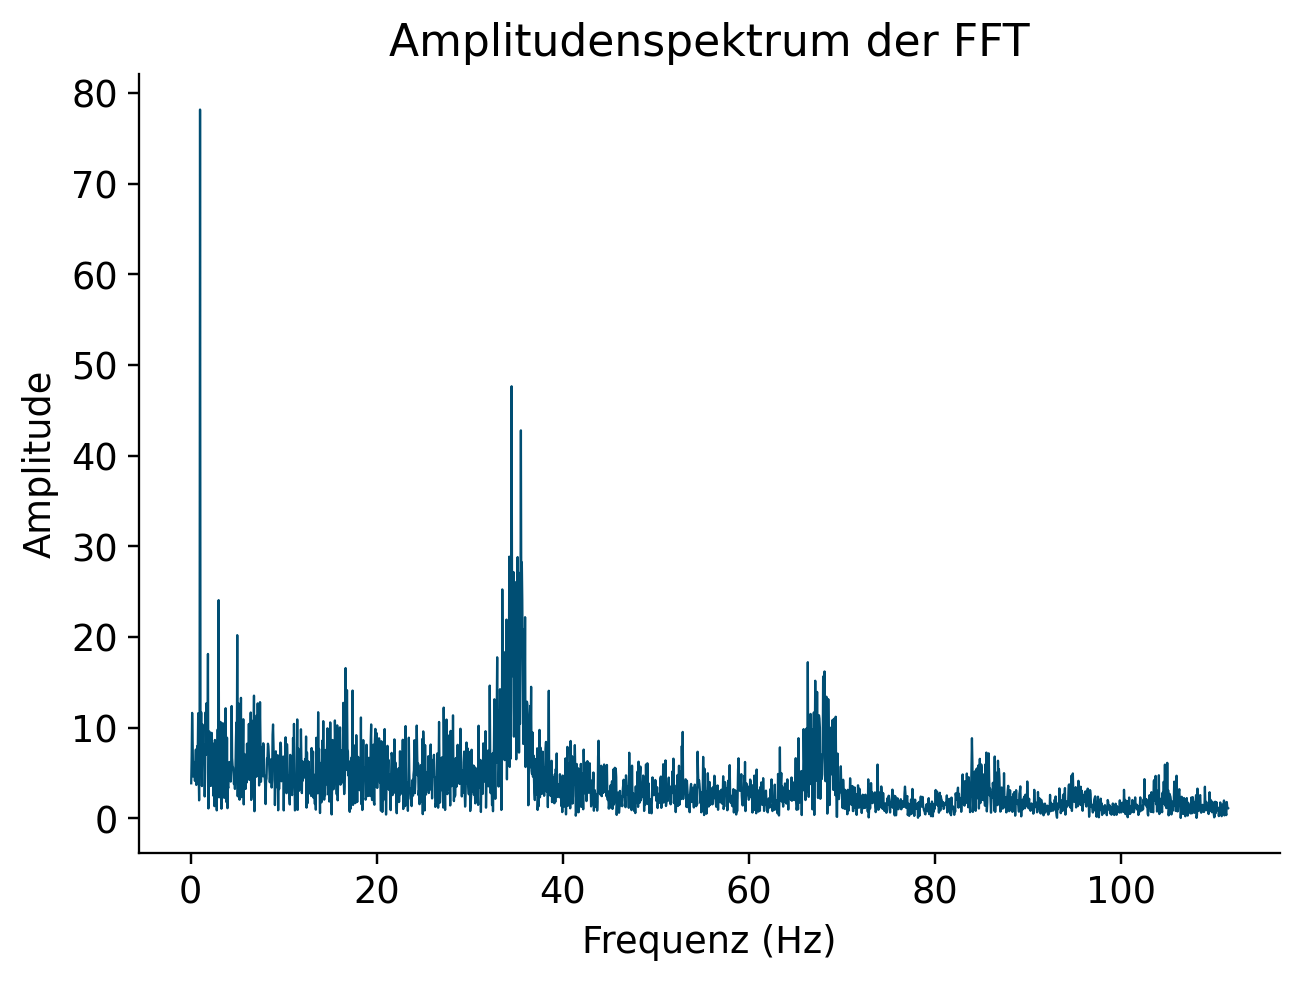

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.


amplitude_spectrum, frequency = my_fft(new_acc_magn, new_vec_time)

# Plotten des Amplitudenspektrums
plt.plot(frequency[1:], amplitude_spectrum[1:])
plt.title('Amplitudenspektrum der FFT')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.show()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/Ukulele_1.jpeg" width="500">
<img src="figures/Ukulele_2.jpeg" width="500">
<img src="figures/Ukulele_3.jpeg" width="500">


- Beschreibung des Aufbaus: Der Beschleunigungssensor wurde mit Hilfe von Tesaklebebands an die Ukulele geklebt und an den Pi angeschlossen.
- Vorgangsbeschreibung: Die Messung wird gestartet. Darauffolgend wird nacheinander jede leere Saite angespielt. Das Spielen der Saiten wiederholt sich bis die Messung beendet ist.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
path_measurement_folder = "measurement_data/data_20240109_135240_ErwinDurasow_Ukulele"
h5_file_name = "data_20240109_135240_ErwinDurasow_Ukulele.h5"

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
h5_file_path = f"{path_measurement_folder}/{h5_file_name}"

# Gruppenname
group_name = sensor_settings_dict["ID"]

# Laden der Daten aus der H5-Datei
with h5py.File(h5_file_path, "r") as file:
    group = file[group_name]
    acc_x = np.array(group["acceleration_x"])
    acc_y = np.array(group["acceleration_y"])
    acc_z = np.array(group["acceleration_z"])
    vec_time = np.array(group["timestamp"])

#### 2. Betrag der Beschleunigung berechnen


In [11]:

acc_x = np.nan_to_num(acc_x, nan=0.0)
acc_y = np.nan_to_num(acc_y, nan=0.0)
acc_z = np.nan_to_num(acc_z, nan=0.0)

# Überprüfen der Werte vor der Berechnung
print("Vor der Berechnung des Betrags:")
print("acceleration_x:", acc_x)
print("acceleration_y:", acc_y)
print("acceleration_z:", acc_z)

# Berechnung des Betrags zu jedem Zeitpunkt
acc_magn = get_vec_accel(acc_x, acc_y, acc_z)

# Überprüfen der Werte nach der Berechnung
print("Nach der Berechnung des Betrags:")
print("acceleration_magnitude:", acc_magn)


Vor der Berechnung des Betrags:
acceleration_x: [-0.5099458 -0.4314926 -0.4314926 ... -0.5099458 -0.5099458 -0.5099458]
acceleration_y: [-1.1375714 -1.1375714 -1.1375714 ... -1.2160246 -1.2160246 -1.2160246]
acceleration_z: [9.3359308 9.3359308 9.3359308 ... 9.2574776 9.2574776 9.3751574]
Nach der Berechnung des Betrags:
acceleration_magnitude: [9.41879596 9.41487432 9.41487432 ... 9.35091718 9.35091718 9.4674356 ]


#### 3. Darstellung der Messdaten

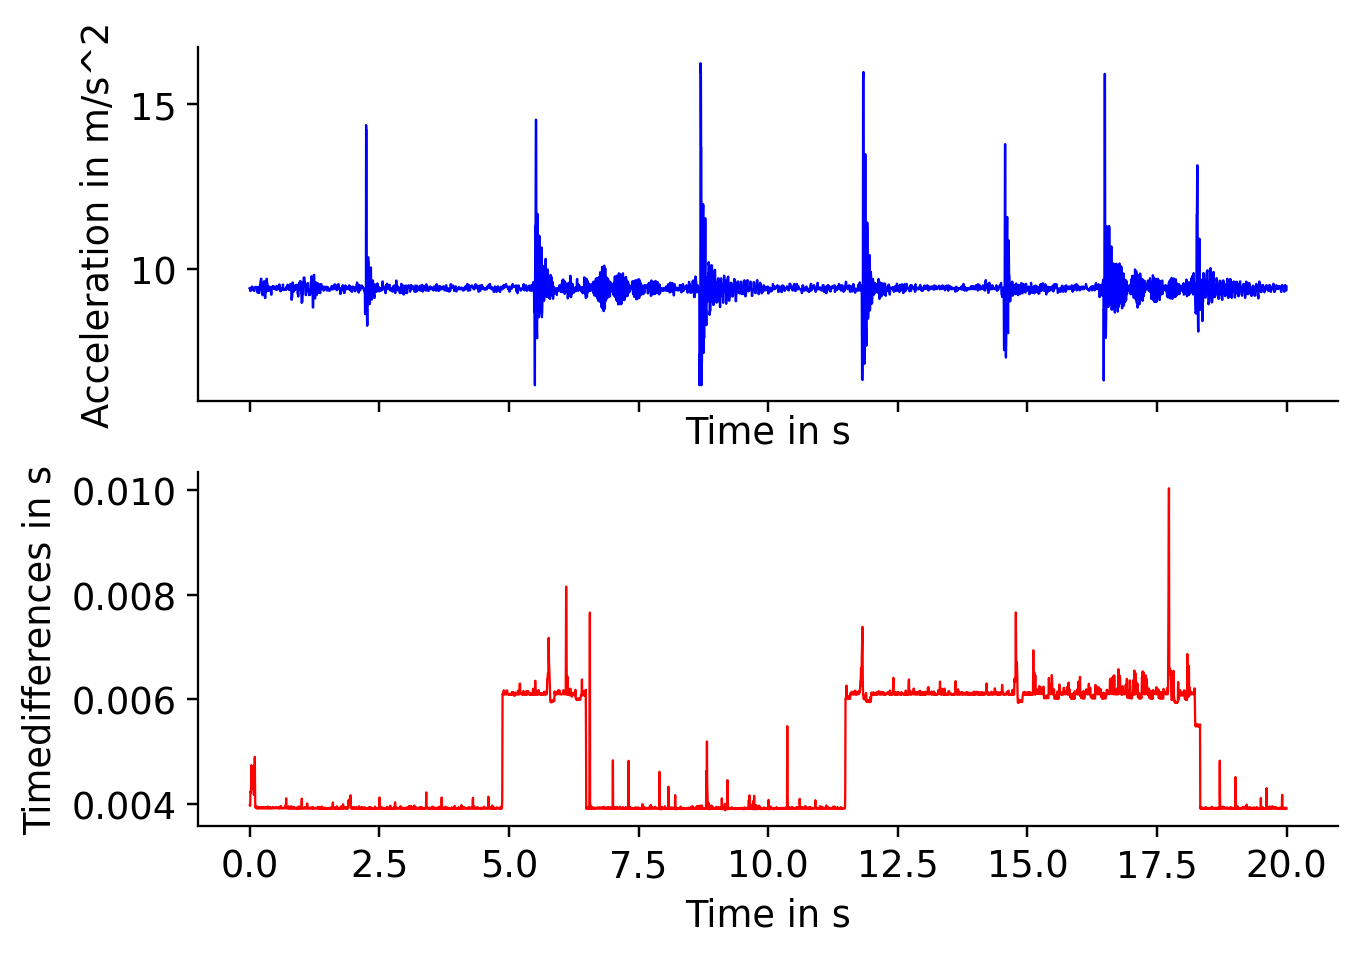

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot für die erste Achse (ax1)
ax1.plot(vec_time,acc_magn, label="acceleration of an playing Ukulele over time", color='blue')
ax1.set_ylabel("Acceleration in m/s^2")
ax1.set_xlabel('Time in s')


diff_vec_time = np.diff(vec_time)

# Plot für die zweite Achse (ax2)
ax2.plot(vec_time[1:], diff_vec_time, label='Timedifferences between Datapoints', color='red')
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Timedifferences in s')


plt.show()

#### 4. Interpolation der Messwerte



In [13]:
(new_vec_time, new_acc_magn)=interpolation(vec_time,acc_magn)

#### 5 & 6. FFT durchführen und graphisch darstellen


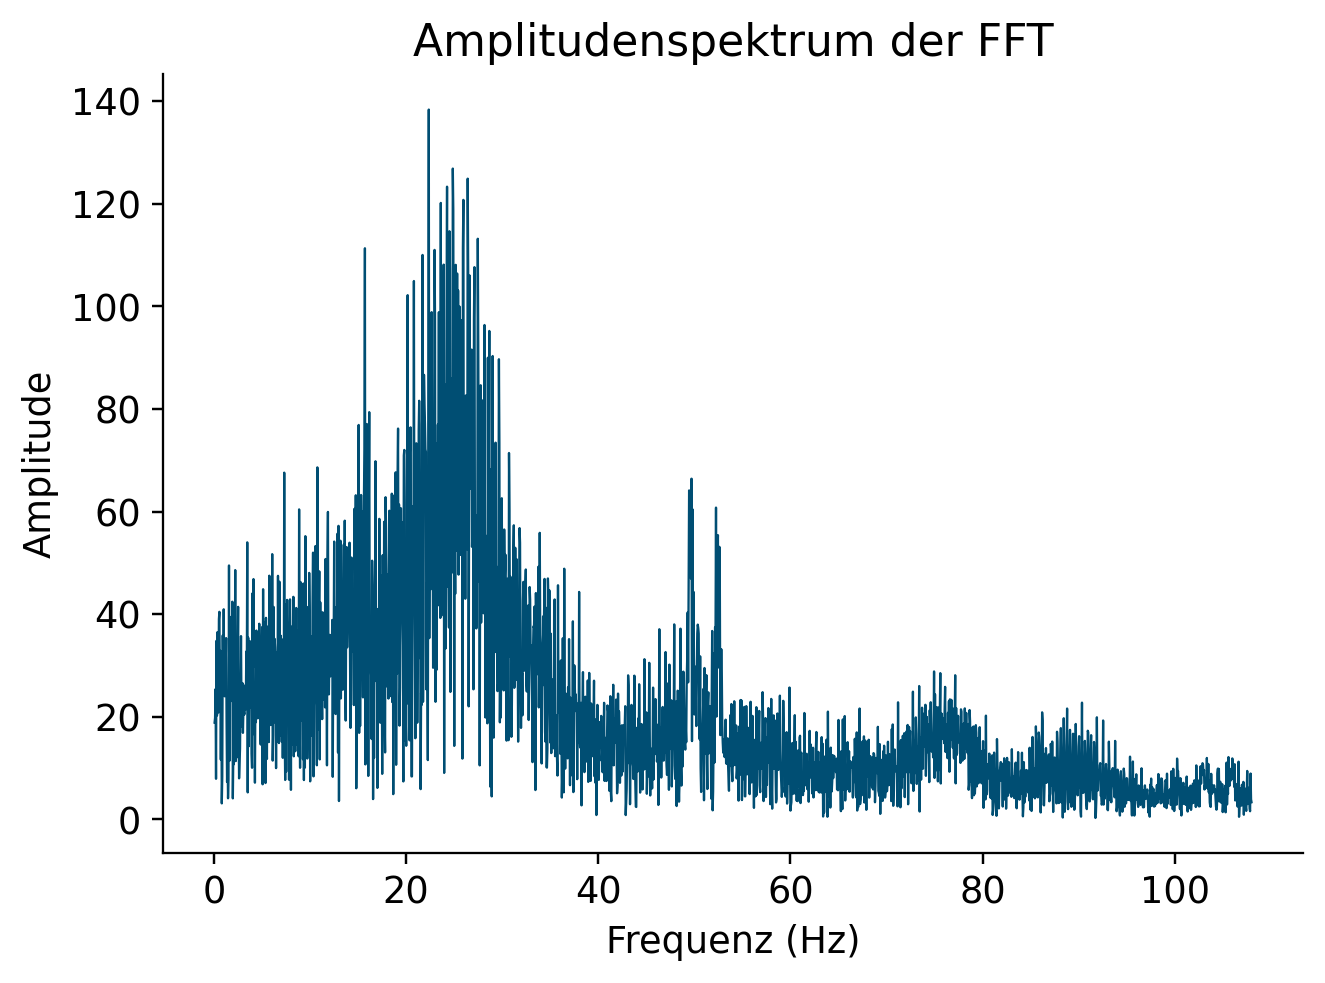

In [14]:
amplitude_spectrum, frequency = my_fft(new_acc_magn, new_vec_time)

# Plotten des Amplitudenspektrums
plt.plot(frequency[1:], amplitude_spectrum[1:])
plt.title('Amplitudenspektrum der FFT')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Man aus den beiden Experimenten erkennen das alle Schwingungen immer viele Frequenzen beinhalten obwohl man dies nicht erwartet wie bei einer Ukulele. Dabei waren die Frequenzen aus dem Elektronischen Gerät viel schärfer und das Rauschen ist kleiner. Es musste die Frequenz 0hz herausfiltert werden, da ansonsten alle anderen frequenzen nicht sichtbar wären.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

In diesem Experiment konnte man erlernen wie man Schwigende Objekte untersuchen kann und die dominierenden Frequenzen durch eine Fouriertransformation identifizieren kann und so weitere Maßnahmen für zb Verbesserung der Akustik oder Ähnliches einleiten kann.